In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import sys , os


In [36]:
root_path = os.path.abspath("..")
print(os.path.join(root_path,"ign.csv"))
df = pd.read_csv(os.path.join(root_path,"ign.csv"))
#additional params in cdv
df = pd.read_csv('my_file.csv', sep=';', encoding='latin-1', nrows=1000, skiprows=[2,5]) 


D:\Dilip\MyExperiments\Python\tensorflowvenv\ign.csv


In [53]:
df.describe()

,score,release_year,release_month,release_day
count,18625.000000,18625.000000,18625.00000,18625.000000
mean,6.950459,2006.515329,7.13847,15.603866
std,1.711736,4.587529,3.47671,8.690128
min,0.500000,1970.000000,1.00000,1.000000
25%,6.000000,2003.000000,4.00000,8.000000
50%,7.300000,2007.000000,8.00000,16.000000
75%,8.200000,2010.000000,10.00000,23.000000
max,10.000000,2016.000000,12.00000,31.000000


In [37]:
df = df.iloc[:,1:] # can specify only indexes if labels need to be specified, use loc ex: df.loc[:,"score"]
df

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
...,...,...,...,...,...,...,...,...,...,...
18620,Good,Tokyo Mirage Sessions #FE,/games/fire-emblem-x-shin-megami-tensei/wii-u-...,Wii U,7.6,RPG,N,2016,6,29
18621,Amazing,LEGO Star Wars: The Force Awakens,/games/lego-star-wars-the-force-awakens/ps4-20...,PlayStation 4,9.0,"Action, Adventure",Y,2016,6,29
18622,Mediocre,Star Ocean: Integrity and Faithlessness,/games/star-ocean-5/ps4-20035681,PlayStation 4,5.8,RPG,N,2016,6,28
18623,Masterpiece,Inside,/games/inside-playdead/xbox-one-121435,Xbox One,10.0,Adventure,Y,2016,6,28


In [38]:
df.loc[:,["score", "release_year"]]  

,score,release_year
0,9.0,2012
1,9.0,2012
2,8.5,2012
3,8.5,2012
4,8.5,2012
...,...,...
18620,7.6,2016
18621,9.0,2016
18622,5.8,2016
18623,10.0,2016


In [39]:
#create a series
s1= pd.Series([1,2])
s2 = pd.Series(["a","b"])
#add that series to the dataframe
pd.DataFrame([s1,s2])

,0,1
0,1,2
1,a,b


#Creating dataframe with column and row name

In [40]:
frame = pd.DataFrame(
    [
    [1,2],
    ["Boris Yeltsin", "Mikhail Gorbachev"] # inner lists are treated as rows
    ],
    index=["row1", "row2"],
    columns=["column1", "column2"]
)
frame

,column1,column2
row1,1,2
row2,Boris Yeltsin,Mikhail Gorbachev


In [41]:
#we can use the following syntax once we have row names
frame.loc["row1":"row2", "column1"]

row1                1
row2    Boris Yeltsin
Name: column1, dtype: object

In [42]:
#Series also has methods related to head() and other functions like mean which are present in DF
df["score"].mean()
df.mean()
#compute mean along the column axis=0
df.mean(axis=0)
df.mean(axis=1) #across Row



0        510.500
1        510.500
2        510.375
3        510.125
4        510.125
          ...   
18620    514.650
18621    515.000
18622    513.950
18623    515.000
18624    515.000
Length: 18625, dtype: float64

pandas.DataFrame.corr — finds the correlation between columns in a DataFrame.
pandas.DataFrame.count — counts the number of non-null values in each DataFrame column.
pandas.DataFrame.max — finds the highest value in each column.
pandas.DataFrame.min — finds the lowest value in each column.
pandas.DataFrame.median — finds the median of each column.
pandas.DataFrame.std — finds the standard deviation of each column.

In [44]:
df["score"] /2 # will divide all values in scores by 2

0        4.50
1        4.50
2        4.25
3        4.25
4        4.25
         ... 
18620    3.80
18621    4.50
18622    2.90
18623    5.00
18624    5.00
Name: score, Length: 18625, dtype: float64

##Boolean Indexing in Pandas

In [45]:
score_filter = df["score"] > 7 # create a boolean map
filtered_reviews = df[score_filter] #pass this map which will filter out and show scores >7
filtered_reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [46]:
xbox_one_filter = (df["score"] > 7) & (df["platform"] == "Xbox One")
filtered_reviews = df[xbox_one_filter]
filtered_reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
17137,Amazing,Gone Home,/games/gone-home/xbox-one-20014361,Xbox One,9.5,Simulation,Y,2013,8,15
17197,Amazing,Rayman Legends,/games/rayman-legends/xbox-one-20008449,Xbox One,9.5,Platformer,Y,2013,8,26
17295,Amazing,LEGO Marvel Super Heroes,/games/lego-marvel-super-heroes/xbox-one-20000826,Xbox One,9.0,Action,Y,2013,10,22
17313,Great,Dead Rising 3,/games/dead-rising-3/xbox-one-124306,Xbox One,8.3,Action,N,2013,11,18
17317,Great,Killer Instinct,/games/killer-instinct-2013/xbox-one-20000538,Xbox One,8.4,Fighting,N,2013,11,18


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000274CA8835C8>,
      dtype=object)

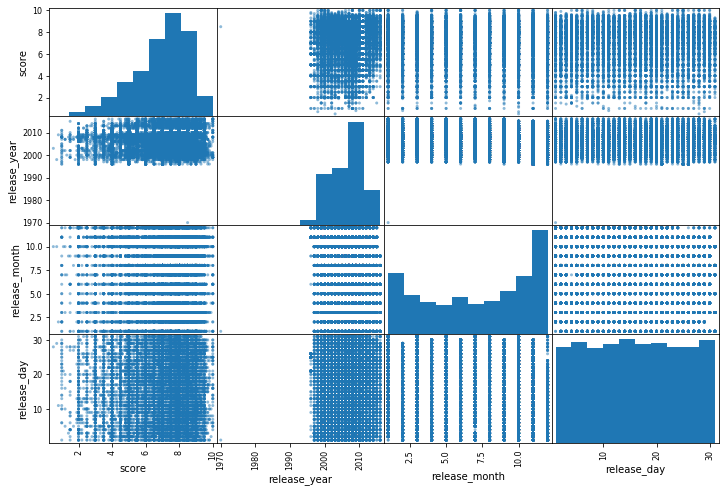

In [47]:
# Example of scatter matrix. It plots all combinations of two columns in the same chart.
pd.plotting.scatter_matrix(df, figsize=(12,8)) 

In [51]:
df.groupby('title')['score'].apply(sum)

title
#IDARB                            7.5
'Splosion Man                     9.0
.deTuned                          4.0
.hack//G.U. Vol. 1: Rebirth       5.0
.hack//G.U. Vol. 2: Reminisce     5.5
                                 ... 
kill.switch                      31.3
realMyst                          6.5
ruthless.com                      5.2
xXx                               6.0
xXx: State of the Union           8.0
Name: score, Length: 12589, dtype: float64

In [52]:
df.merge(other_data, on=['column_1', 'column_2', 'column_3']) 
#joining on 3 columns takes just one line


NameError: name 'other_data' is not defined

In [ ]:
dictionary = {}

for i,row in data.iterrows():
  dictionary[row['column_1']] = row['column_2']

#The .iterrows() loops through 2 variables together: the index of the row and the row (i and row in the code above).